

---

#MLF_MPA : Final Project

---

*Madec Sacha and Kerbous Chadène*





Imports

In [ ]:
pip install keras_sequential_ascii

  Preparing metadata (setup.py) ... done
  Created wheel for keras_sequential_ascii: filename=keras_sequential_ascii-0.1.1-py3-none-any.whl size=3042 sha256=2d03fab69b4c31ffcbc6ecf83cbc9d6a164de9bbdec5143ce1428dcbd5ff8a93
  Stored in directory: /root/.cache/pip/wheels/50/10/f3/5eeae758ef81ee4e16d618471561509355b0f2e5f38bf41185
Successfully built keras_sequential_ascii


In [ ]:
pip install netron

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 13.6 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import csv
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
import numpy as np
from sklearn.cluster import DBSCAN
import zipfile
import io, os
from tensorflow import keras
import matplotlib

import keras,os
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.utils import to_categorical
from keras.layers import Conv2D
from keras.layers import Dense, Flatten, Dropout
from keras.layers import MaxPooling2D
from keras.layers import MaxPool2D
from keras.optimizers import Adam
from keras.regularizers import l2
import tensorflow as tf



from keras.callbacks import ModelCheckpoint, EarlyStopping

from PIL import Image

from torchvision.models import resnet50, ResNet50_Weights
import torch
import torchvision.transforms as transforms
import torchvision.models as models
from torch.utils.data import Dataset
from keras_sequential_ascii import keras2ascii

###Data Preparation

Unziping the files and loading the data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Open the files for Chadene**

In [ ]:
zip_train_path = '/content/drive/MyDrive/Machine_learning/Final_project_Data/train_data_unlabeled.zip'
zip_test_path = '/content/drive/MyDrive/Machine_learning/Final_project_Data/test_data_unlabeled.zip'
with zipfile.ZipFile(zip_train_path, 'r') as zip_ref:
    zip_ref.extractall('/content/x_train')

with zipfile.ZipFile(zip_test_path, 'r') as zip_ref:
    zip_ref.extractall('/content/x_test')


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Machine_learning/Final_project_Data/train_data_unlabeled.zip'

**Open the files for Sacha**

In [ ]:
zip_train_path = '/content/drive/MyDrive/Mobilités/Machine Learning/Final Project/train_data_unlabeled.zip'
zip_test_path = '/content/drive/MyDrive/Mobilités/Machine Learning/Final Project/test_data_unlabeled.zip'
with zipfile.ZipFile(zip_train_path, 'r') as zip_ref:
    zip_ref.extractall('/content/x_train')

with zipfile.ZipFile(zip_test_path, 'r') as zip_ref:
    zip_ref.extractall('/content/x_test')


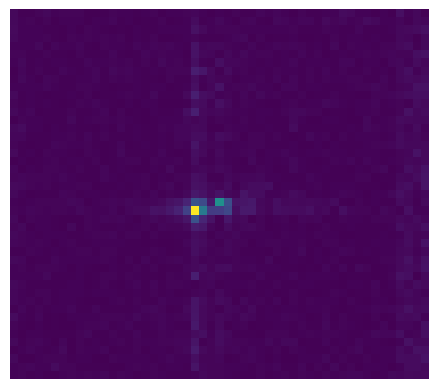

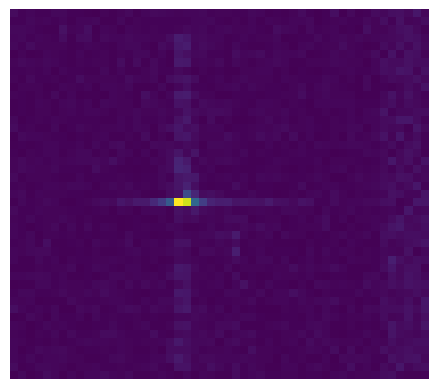

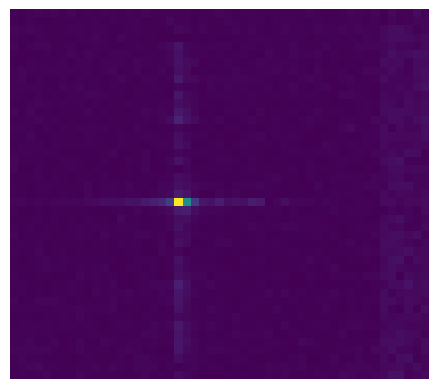

In [ ]:
train_folder = '/content/x_train/train_data_unlabeled'
test_folder = '/content/x_test/test_data_unlabeled'

# Print some images
train_files_part = os.listdir(train_folder)[:3]
for file in train_files_part:
    img_path = os.path.join(train_folder, file)
    img = Image.open(img_path)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

**Open the files for Chadene**

In [ ]:
csv_path = '/content/drive/MyDrive/Machine_learning/Final_project_Data/y_train.csv'

y_train_df = pd.read_csv(csv_path)

print(y_train_df.head())


   id  target
0   0       0
1   1       1
2   2       0
3   3       2
4   4       2


**Open the files for Sacha**

In [ ]:
csv_path = '/content/drive/MyDrive/Mobilités/Machine Learning/Final Project/y_train.csv'

y_train_df = pd.read_csv(csv_path)

print(y_train_df.head())

   id  target
0   0       0
1   1       1
2   2       0
3   3       2
4   4       2


In [ ]:
train_files = os.listdir(train_folder)
#sorting the name of the images
train_files = sorted(train_files, key=lambda x: int(x.split('_')[1][:-4]))

train_file_paths = [os.path.join(train_folder, file) for file in train_files]

y_train = y_train_df['target']


X_train = []
for file_path in train_file_paths:
    img = Image.open(file_path)
    img_array = np.array(img, dtype=np.float32) / 255.0
    img_array = img_array[:, :, :3]
    X_train.append(img_array)
X_train = np.array(X_train)


y_train_encoded = to_categorical(y_train, num_classes=4)

In [ ]:
X_train.shape

(16182, 45, 51, 3)

In [ ]:
test_files = os.listdir(test_folder)
#sorting the name of the images
test_files = sorted(test_files, key=lambda x: int(x.split('_')[1][:-4]))

test_file_paths = [os.path.join(test_folder, file) for file in test_files]


X_test = []
for file_path in test_file_paths:
    img = Image.open(file_path)
    img_array = np.array(img, dtype=np.float32) / 255.0
    img_array = img_array[:, :, :3]
    X_test.append(img_array)
X_test = np.array(X_test)

##test1

**CNN model (Keras API)**

In [ ]:
basicmodel = Sequential()
basicmodel.add(Conv2D(32, (3, 3), activation='sigmoid', input_shape=(45, 51, 3)))
basicmodel.add(MaxPooling2D((2, 2)))
basicmodel.add(Flatten())
basicmodel.add(Dense(128, activation='sigmoid'))
basicmodel.add(Dense(4, activation='softmax'))

In [ ]:
loss = 'categorical_crossentropy'
optimizer = tf.keras.optimizers.SGD(learning_rate=0.1)
metrics = ['accuracy']
learning_rate = 0.001

basicmodel.compile(loss=loss, optimizer=optimizer, metrics=metrics)

In [ ]:
history = basicmodel.fit(X_train, y_train_encoded, epochs=10, batch_size=1000, validation_split = 0.2)
basicmodel.summary()

Epoch 1/10
13/13 [==============================] - 5s 135ms/step - loss: 1.7348 - accuracy: 0.3155 - val_loss: 1.3351 - val_accuracy: 0.3457
Epoch 2/10
13/13 [==============================] - 1s 52ms/step - loss: 1.3380 - accuracy: 0.3262 - val_loss: 1.3329 - val_accuracy: 0.3457
Epoch 3/10
13/13 [==============================] - 1s 48ms/step - loss: 1.3376 - accuracy: 0.3234 - val_loss: 1.3333 - val_accuracy: 0.3457
Epoch 4/10
13/13 [==============================] - 1s 52ms/step - loss: 1.3385 - accuracy: 0.3180 - val_loss: 1.3332 - val_accuracy: 0.3457
Epoch 5/10
13/13 [==============================] - 1s 48ms/step - loss: 1.3369 - accuracy: 0.3320 - val_loss: 1.3328 - val_accuracy: 0.3457
Epoch 6/10
13/13 [==============================] - 1s 53ms/step - loss: 1.3373 - accuracy: 0.3320 - val_loss: 1.3322 - val_accuracy: 0.3457
Epoch 7/10
13/13 [==============================] - 1s 57ms/step - loss: 1.3384 - accuracy: 0.3320 - val_loss: 1.3337 - val_accuracy: 0.3457
Epoch 8/10
1

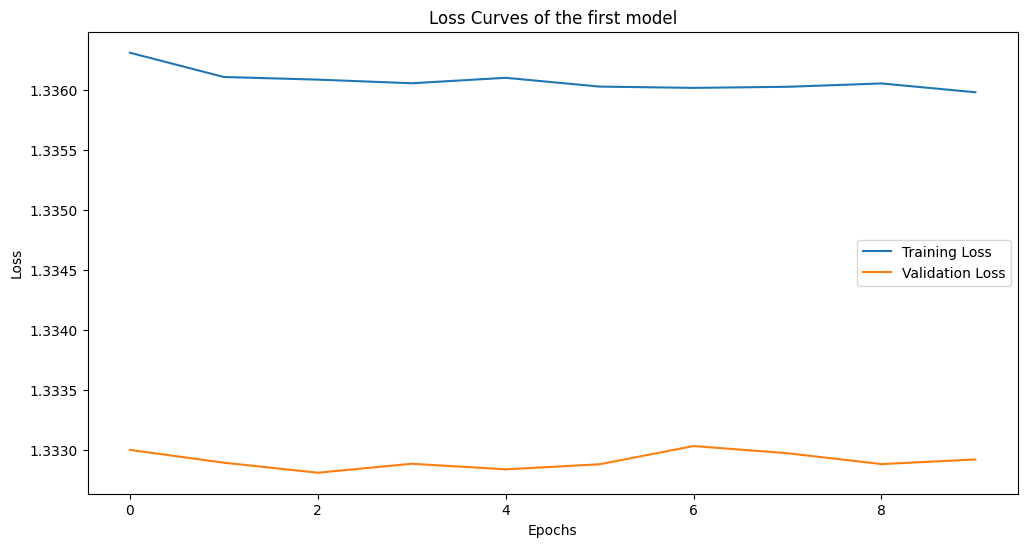

In [ ]:
train_loss = history.history['loss']
train_accuracy = history.history['accuracy']

val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']

plt.figure(figsize=(12, 6))
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Loss Curves of the first model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


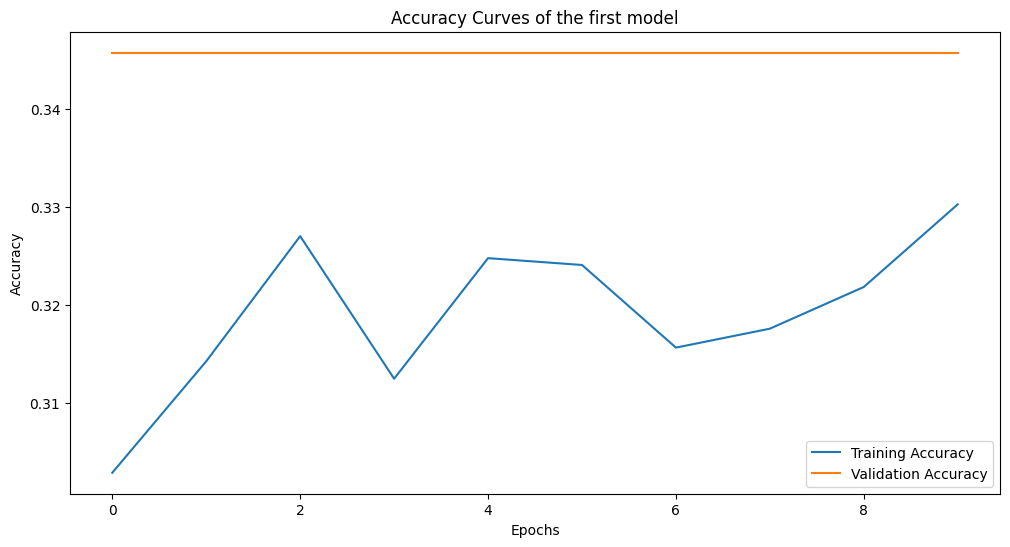

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Accuracy Curves of the first model')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
keras2ascii(basicmodel)

           OPERATION           DATA DIMENSIONS   WEIGHTS(N)   WEIGHTS(%)

               Input   #####     45   51    3
              Conv2D    \|/  -------------------       896     0.0%
             sigmoid   #####     43   49   32
        MaxPooling2D   Y max -------------------         0     0.0%
                       #####     21   24   32
             Flatten   ||||| -------------------         0     0.0%
                       #####       16128
               Dense   XXXXX -------------------   2064512    99.9%
             sigmoid   #####         128
               Dense   XXXXX -------------------       516     0.0%
             softmax   #####           4


##test2
Creating a more complex model by adding convolution layers and maxpooling layers.

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(45, 51, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))

In [ ]:
loss = 'categorical_crossentropy'
optimizer = keras.optimizers.Adam(learning_rate = 0.001)
metrics = ['accuracy']
learning_rate = 0.001

model.compile(loss=loss, optimizer=optimizer, metrics=metrics)

In [ ]:
history = model.fit(X_train, y_train_encoded, epochs=10, batch_size=1000, validation_split = 0.2)
model.summary()

Epoch 1/10
13/13 [==============================] - 7s 190ms/step - loss: 1.3250 - accuracy: 0.3543 - val_loss: 1.2308 - val_accuracy: 0.4974
Epoch 2/10
13/13 [==============================] - 1s 70ms/step - loss: 1.1479 - accuracy: 0.5027 - val_loss: 1.0293 - val_accuracy: 0.5366
Epoch 3/10
13/13 [==============================] - 1s 71ms/step - loss: 0.9820 - accuracy: 0.5647 - val_loss: 0.8748 - val_accuracy: 0.6713
Epoch 4/10
13/13 [==============================] - 1s 72ms/step - loss: 0.8773 - accuracy: 0.6321 - val_loss: 0.7724 - val_accuracy: 0.7331
Epoch 5/10
13/13 [==============================] - 1s 77ms/step - loss: 0.7878 - accuracy: 0.6922 - val_loss: 0.6865 - val_accuracy: 0.7383
Epoch 6/10
13/13 [==============================] - 1s 70ms/step - loss: 0.7340 - accuracy: 0.7164 - val_loss: 0.6197 - val_accuracy: 0.7671
Epoch 7/10
13/13 [==============================] - 1s 70ms/step - loss: 0.6704 - accuracy: 0.7370 - val_loss: 0.5810 - val_accuracy: 0.7742
Epoch 8/10
1

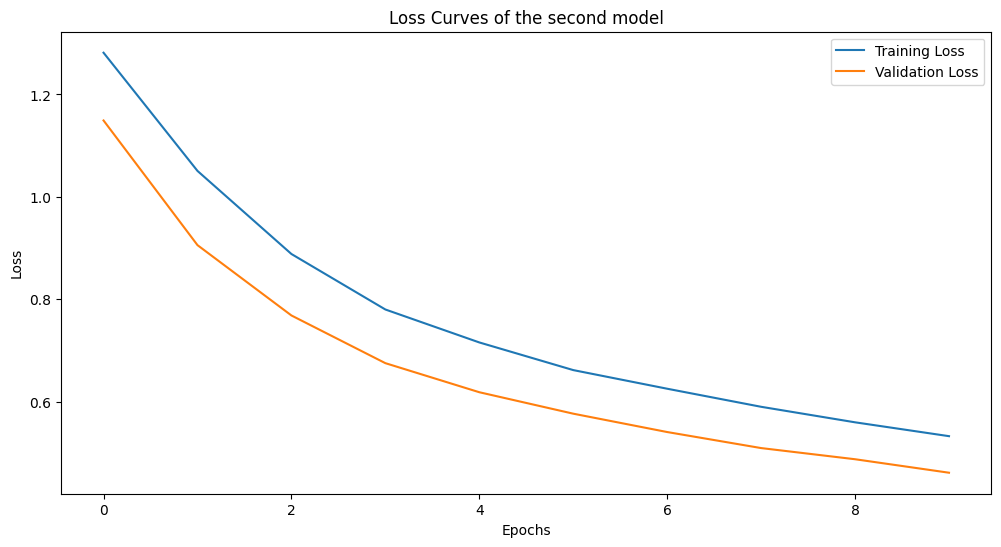

In [ ]:
train_loss1 = history.history['loss']
train_accuracy1 = history.history['accuracy']

val_loss1 = history.history['val_loss']
val_accuracy1 = history.history['val_accuracy']

plt.figure(figsize=(12, 6))
plt.plot(train_loss1, label='Training Loss')
plt.plot(val_loss1, label='Validation Loss')
plt.title('Loss Curves of the second model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

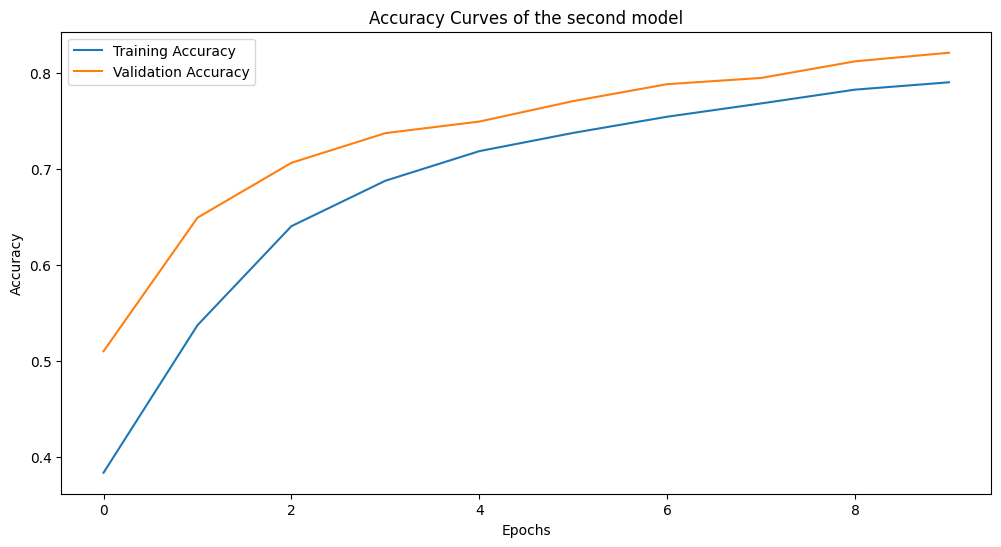

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(train_accuracy1, label='Training Accuracy')
plt.plot(val_accuracy1, label='Validation Accuracy')
plt.title('Accuracy Curves of the second model')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
keras2ascii(model)

           OPERATION           DATA DIMENSIONS   WEIGHTS(N)   WEIGHTS(%)

               Input   #####     45   51    3
              Conv2D    \|/  -------------------       896     0.1%
                relu   #####     43   49   32
        MaxPooling2D   Y max -------------------         0     0.0%
                       #####     21   24   32
              Conv2D    \|/  -------------------     18496     2.2%
                relu   #####     19   22   64
        MaxPooling2D   Y max -------------------         0     0.0%
                       #####      9   11   64
             Dropout    | || -------------------         0     0.0%
                       #####      9   11   64
             Flatten   ||||| -------------------         0     0.0%
                       #####        6336
               Dense   XXXXX -------------------    811136    97.6%
                relu   #####         128
             Dropout    | || -------------------         0     0.0%
                       #

In [ ]:
predictions = model.predict(X_test)
predictions = np.argmax(predictions, axis=1)
ids = np.arange(len(predictions))
predictions_with_id = np.vstack((ids, predictions)).T
column_names = ['id', 'target']
df = pd.DataFrame(predictions_with_id, columns=column_names)
df.to_csv('sample_subbmission.csv', index=False)

150/150 [==============================] - 1s 4ms/step


##test3

**Updated CNN**
 1. more convolution layer,
 2. more dropout,
 3. more MaxPooling,
 4. change of hyperparameters : increasing epochs (from10 to 20) and increasing batch size (from 1000 to 1500)**




In [ ]:
model2 = Sequential()
model2.add(Conv2D(32, (3, 3), activation='relu', input_shape=(45, 51, 3)))
model2.add(MaxPooling2D((2, 2)))
model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(MaxPooling2D((2, 2)))
model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(MaxPooling2D((2, 2)))
model2.add(Dropout(0.5))
model2.add(Flatten())
model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(128, activation='relu'))
model2.add(Dense(4, activation='softmax'))

In [ ]:
loss = 'categorical_crossentropy'
optimizer = keras.optimizers.Adam(learning_rate = 0.001)
metrics = ['accuracy']
learning_rate = 0.001

model2.compile(loss=loss, optimizer=optimizer, metrics=metrics)

In [ ]:
history = model2.fit(X_train, y_train_encoded, epochs=20, batch_size=1500, validation_split = 0.2)
model2.summary()

Epoch 1/20
9/9 [==============================] - 14s 504ms/step - loss: 1.3472 - accuracy: 0.3232 - val_loss: 1.3210 - val_accuracy: 0.3457
Epoch 2/20
9/9 [==============================] - 2s 196ms/step - loss: 1.3034 - accuracy: 0.3575 - val_loss: 1.2238 - val_accuracy: 0.4529
Epoch 3/20
9/9 [==============================] - 1s 145ms/step - loss: 1.1602 - accuracy: 0.4620 - val_loss: 1.0159 - val_accuracy: 0.5153
Epoch 4/20
9/9 [==============================] - 1s 165ms/step - loss: 1.0174 - accuracy: 0.5153 - val_loss: 0.9350 - val_accuracy: 0.6095
Epoch 5/20
9/9 [==============================] - 1s 160ms/step - loss: 0.9369 - accuracy: 0.5689 - val_loss: 0.8188 - val_accuracy: 0.6753
Epoch 6/20
9/9 [==============================] - 1s 146ms/step - loss: 0.8352 - accuracy: 0.6495 - val_loss: 0.7210 - val_accuracy: 0.6880
Epoch 7/20
9/9 [==============================] - 1s 148ms/step - loss: 0.7327 - accuracy: 0.6925 - val_loss: 0.6499 - val_accuracy: 0.7189
Epoch 8/20
9/9 [===

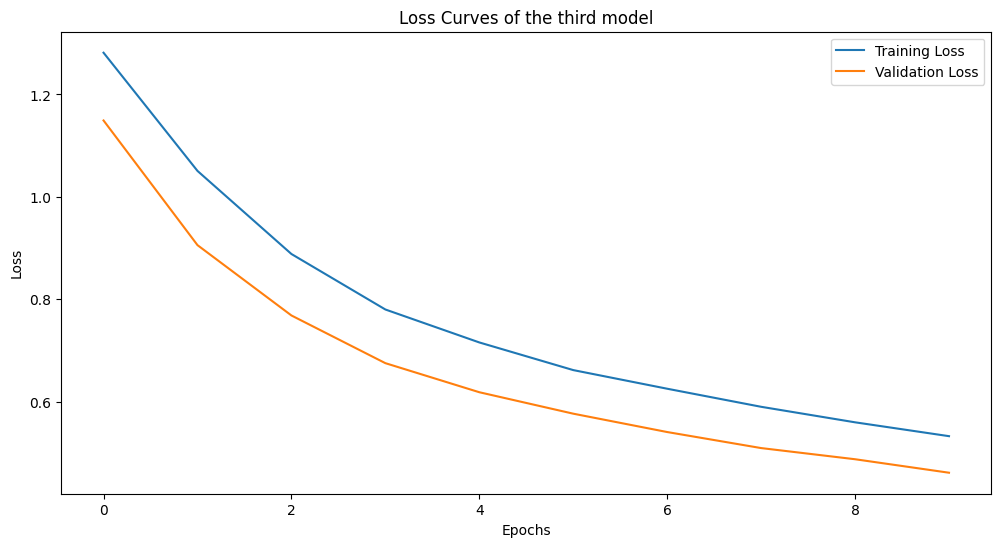

In [ ]:
train_loss2 = history.history['loss']
train_accuracy2 = history.history['accuracy']

val_loss2 = history.history['val_loss']
val_accuracy2 = history.history['val_accuracy']

plt.figure(figsize=(12, 6))
plt.plot(train_loss1, label='Training Loss')
plt.plot(val_loss1, label='Validation Loss')
plt.title('Loss Curves of the third model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

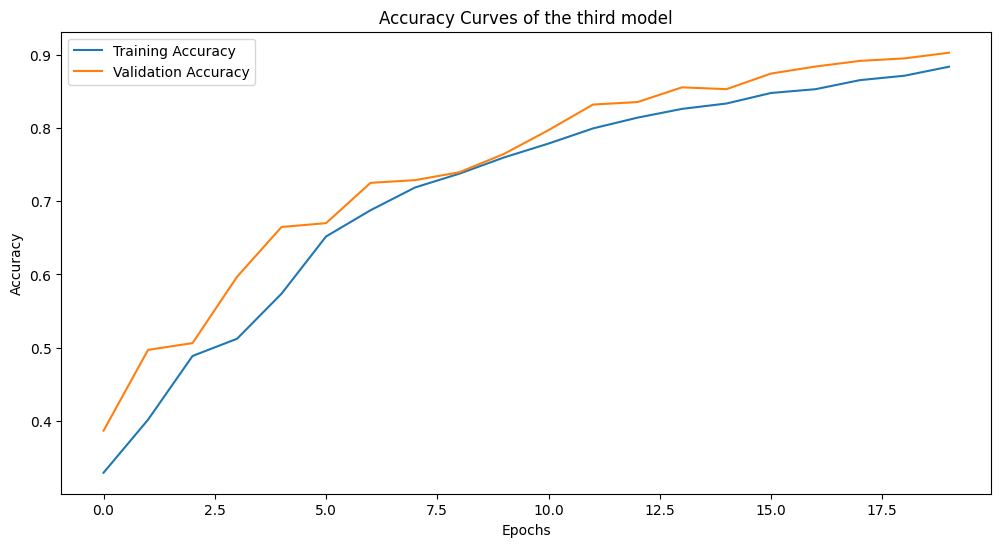

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(train_accuracy2, label='Training Accuracy')
plt.plot(val_accuracy2, label='Validation Accuracy')
plt.title('Accuracy Curves of the third model')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
predictions2 = model2.predict(X_test)
predictions2 = np.argmax(predictions2, axis=1)
ids2 = np.arange(len(predictions2))

predictions2_with_id = np.vstack((ids2, predictions2)).T

column_names = ['id', 'target']

df = pd.DataFrame(predictions2_with_id, columns=column_names)
df.to_csv('sample_subbmission2.csv', index=False)

150/150 [==============================] - 1s 4ms/step


##test4
**Updated CNN**
- Increasing significantly epochs (from 20 to 100) and batch_size (from 1500 to 12000)

In [ ]:
model3 = Sequential()
model3.add(Conv2D(32, (3, 3), activation='relu', input_shape=(45, 51, 3)))
model3.add(MaxPooling2D((2, 2)))
model3.add(Conv2D(64, (3, 3), activation='relu'))
model3.add(Conv2D(64, (3, 3), activation='relu'))
model3.add(MaxPooling2D((2, 2)))
model3.add(Conv2D(64, (3, 3), activation='relu'))
model3.add(Conv2D(64, (3, 3), activation='relu'))
model3.add(Conv2D(64, (3, 3), activation='relu'))
model3.add(MaxPooling2D((2, 2)))
model3.add(Dropout(0.5))
model3.add(Flatten())
model3.add(Dense(128, activation='relu'))
model3.add(Dropout(0.5))
model3.add(Dense(128, activation='relu'))
model3.add(Dense(4, activation='softmax'))

loss = 'categorical_crossentropy'
optimizer = keras.optimizers.Adam(learning_rate = 0.001)
metrics = ['accuracy']
learning_rate = 0.001

model3.compile(loss=loss, optimizer=optimizer, metrics=metrics)

In [ ]:
history = model3.fit(X_train, y_train_encoded, epochs=250, batch_size=12000, validation_split = 0.2)

Epoch 1/250
2/2 [==============================] - 4s 597ms/step - loss: 1.3850 - accuracy: 0.2873 - val_loss: 1.3549 - val_accuracy: 0.3457
Epoch 2/250
2/2 [==============================] - 1s 279ms/step - loss: 1.3543 - accuracy: 0.3268 - val_loss: 1.3306 - val_accuracy: 0.3457
Epoch 3/250
2/2 [==============================] - 1s 265ms/step - loss: 1.3484 - accuracy: 0.3220 - val_loss: 1.3396 - val_accuracy: 0.3457
Epoch 4/250
2/2 [==============================] - 1s 236ms/step - loss: 1.3395 - accuracy: 0.3207 - val_loss: 1.3334 - val_accuracy: 0.3457
Epoch 5/250
2/2 [==============================] - 1s 261ms/step - loss: 1.3352 - accuracy: 0.3284 - val_loss: 1.3243 - val_accuracy: 0.3457
Epoch 6/250
2/2 [==============================] - 1s 235ms/step - loss: 1.3308 - accuracy: 0.3364 - val_loss: 1.3186 - val_accuracy: 0.3457
Epoch 7/250
2/2 [==============================] - 1s 200ms/step - loss: 1.3206 - accuracy: 0.3364 - val_loss: 1.3069 - val_accuracy: 0.3553
Epoch 8/250
2

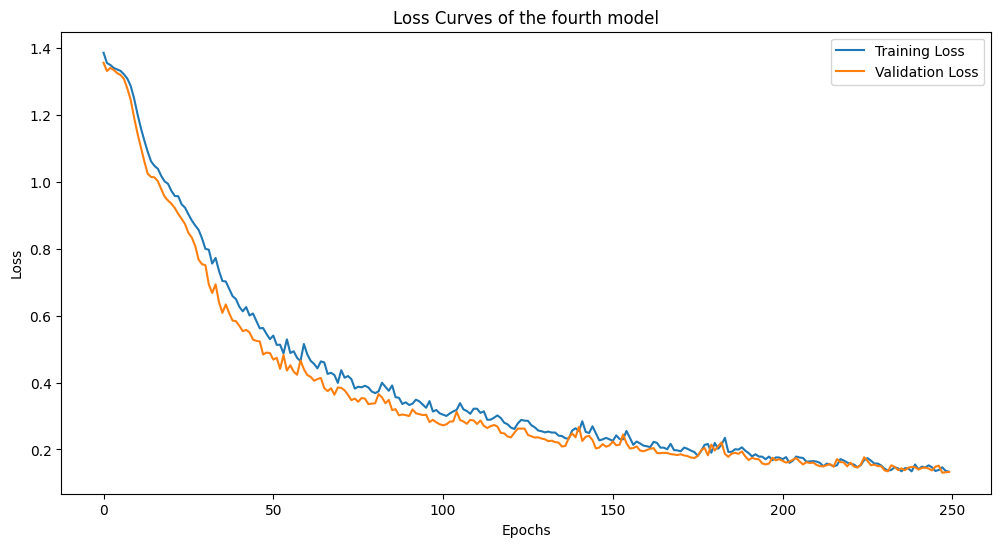

In [ ]:
train_loss3 = history.history['loss']
train_accuracy3 = history.history['accuracy']

val_loss3 = history.history['val_loss']
val_accuracy3 = history.history['val_accuracy']

# Tracé des courbes de perte
plt.figure(figsize=(12, 6))
plt.plot(train_loss3, label='Training Loss')
plt.plot(val_loss3, label='Validation Loss')
plt.title('Loss Curves of the fourth model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


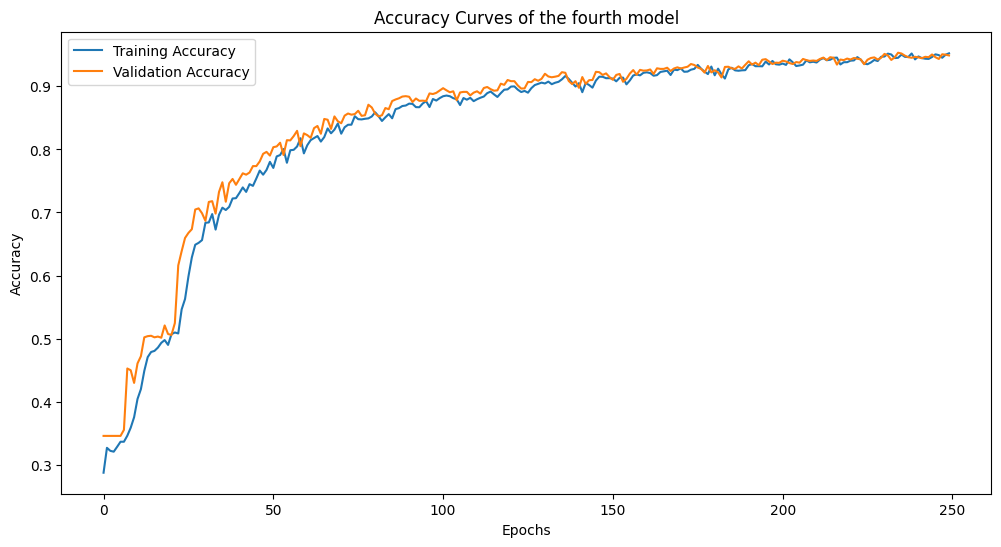

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(train_accuracy3, label='Training Accuracy')
plt.plot(val_accuracy3, label='Validation Accuracy')
plt.title('Accuracy Curves of the fourth model')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
keras2ascii(model3)

           OPERATION           DATA DIMENSIONS   WEIGHTS(N)   WEIGHTS(%)

               Input   #####     45   51    3
              Conv2D    \|/  -------------------       896     0.4%
                relu   #####     43   49   32
        MaxPooling2D   Y max -------------------         0     0.0%
                       #####     21   24   32
              Conv2D    \|/  -------------------     18496     9.2%
                relu   #####     19   22   64
              Conv2D    \|/  -------------------     36928    18.4%
                relu   #####     17   20   64
        MaxPooling2D   Y max -------------------         0     0.0%
                       #####      8   10   64
              Conv2D    \|/  -------------------     36928    18.4%
                relu   #####      6    8   64
              Conv2D    \|/  -------------------     36928    18.4%
                relu   #####      4    6   64
              Conv2D    \|/  -------------------     36928    18.4%
              

In [ ]:
predictions3 = model3.predict(X_test)
predictions3 = np.argmax(predictions3, axis=1)
ids3 = np.arange(len(predictions3))

predictions3_with_id = np.vstack((ids3, predictions3)).T

column_names = ['id', 'target']

df = pd.DataFrame(predictions3_with_id, columns=column_names)
df.to_csv('sample_subbmission10.csv', index=False)

150/150 [==============================] - 1s 3ms/step


##test5
**Continue to try update it**
 1. more convolution layer,
 2. more dropout,
 3. more MaxPooling,
 4. change hyperparameters ; decreasing epochs (from 100 to 50) and batch sizes (from 12000 to 4000)

Very bad for now

In [ ]:
model4 = Sequential()
model4.add(Conv2D(32, (3, 3), activation='relu', input_shape=(45, 51, 3)))
model4.add(MaxPooling2D((2, 2)))
model4.add(Conv2D(32, (3, 3), activation='relu', input_shape=(45, 51, 3)))
model4.add(Conv2D(64, (3, 3), activation='relu'))
model4.add(MaxPooling2D((2, 2)))
model4.add(Conv2D(32, (3, 3), activation='relu',padding='same', input_shape=(45, 51, 3),kernel_regularizer=l2(0.001)))
model4.add(Conv2D(64, (3, 3), activation='relu'))
model4.add(Conv2D(64, (3, 3), activation='relu'))
model4.add(MaxPooling2D((2, 2)))
model4.add(Conv2D(32, (3, 3), activation='relu', padding='same',input_shape=(45, 51, 3),kernel_regularizer=l2(0.001)))
model4.add(Conv2D(64, (3, 3),padding='same', activation='relu'))
model4.add(Conv2D(64, (3, 3),padding='same', activation='relu'))
model4.add(MaxPooling2D((2, 2)))
model4.add(Dropout(0.5))
model4.add(Flatten())
model4.add(Dense(128, activation='relu'))
model4.add(Dropout(0.5))
model4.add(Dense(128, activation='relu'))
model4.add(Dense(4, activation='softmax'))

loss = 'categorical_crossentropy'
optimizer = keras.optimizers.Adam(learning_rate = 0.001)
metrics = ['accuracy']
learning_rate = 0.0005

model4.compile(loss=loss, optimizer=optimizer, metrics=metrics)

In [ ]:
history = model4.fit(X_train, y_train_encoded, epochs=50, batch_size=4000, validation_split = 0.2)

Epoch 1/50
4/4 [==============================] - 21s 2s/step - loss: 1.4595 - accuracy: 0.3132 - val_loss: 1.4090 - val_accuracy: 0.3457
Epoch 2/50
4/4 [==============================] - 2s 514ms/step - loss: 1.4176 - accuracy: 0.3217 - val_loss: 1.4065 - val_accuracy: 0.3457
Epoch 3/50
4/4 [==============================] - 2s 409ms/step - loss: 1.4058 - accuracy: 0.3170 - val_loss: 1.3917 - val_accuracy: 0.3457
Epoch 4/50
4/4 [==============================] - 1s 329ms/step - loss: 1.3941 - accuracy: 0.3284 - val_loss: 1.3828 - val_accuracy: 0.3457
Epoch 5/50
4/4 [==============================] - 1s 303ms/step - loss: 1.3818 - accuracy: 0.3327 - val_loss: 1.3669 - val_accuracy: 0.3457
Epoch 6/50
4/4 [==============================] - 1s 391ms/step - loss: 1.3686 - accuracy: 0.3310 - val_loss: 1.3408 - val_accuracy: 0.3457
Epoch 7/50
4/4 [==============================] - 1s 325ms/step - loss: 1.3279 - accuracy: 0.3533 - val_loss: 1.2640 - val_accuracy: 0.4303
Epoch 8/50
4/4 [======

In [ ]:
predictions4 = model4.predict(X_test)
predictions4 = np.argmax(predictions4, axis=1)
ids4 = np.arange(len(predictions4))

predictions4_with_id = np.vstack((ids4, predictions4)).T

column_names = ['id', 'target']

df = pd.DataFrame(predictions4_with_id, columns=column_names)
df.to_csv('sample_subbmission6.csv', index=False)

150/150 [==============================] - 2s 8ms/step
